<a href="https://colab.research.google.com/github/MarcinBadora1/Machine_Learning/blob/main/LogisticRegression_Census_Income%20Sci-KitLearn_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Income
This is a Sci-Kit Learn + Pandas example of classification problem. The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Uncomment this if you are using Google Colab
!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv

--2020-11-18 06:01:39--  https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3152687 (3.0M) [text/plain]
Saving to: ‘census.csv’

census.csv          100%[===================>]   3.01M  --.-KB/s    in 0.1s    

2020-11-18 06:01:39 (30.5 MB/s) - ‘census.csv’ saved [3152687/3152687]



### Load dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv")

print (df.shape)
print (df.columns)
df.head()

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Task 1 - Initial analysis
Perform initial analysis to understand the data.

In [ ]:
df.shape
#df.isnull()
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

([<matplotlib.patches.Wedge at 0x7f2c839c9940>,
 [Text(-0.6382328657960867, 0.8959122775237063, '22696'),
  Text(-0.09629718640575076, -1.095776825768065, '2541'),
  Text(0.3869338344503945, -1.029700057180495, '2093'),
  Text(0.7421694823654204, -0.8119017547988452, '1857'),
  Text(0.9513962042040199, -0.5521279404505653, '1298'),
  Text(1.0531442459487788, -0.31762745036438267, '1116'),
  Text(1.0952848128257795, -0.10174074303442723, '960')])

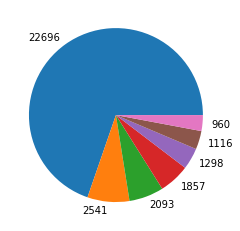

In [ ]:
df.workclass.value_counts()
df.workclass = df.workclass.replace('?', 0)
df.workclass = df.workclass.replace('Without-pay', 0)
df.workclass = df.workclass.replace('Never-worked', 0)
#df.workclass.value_counts().plot().hist
plt.pie(df.workclass.value_counts(),labels=df.workclass.value_counts().tolist())

In [ ]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df['education-num'].isnull().sum()

0

In [ ]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
df.relationship.value_counts()
#ownchild = brak informacji  
#df.relationship = df.relationship.replace('Own-child', 0)

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

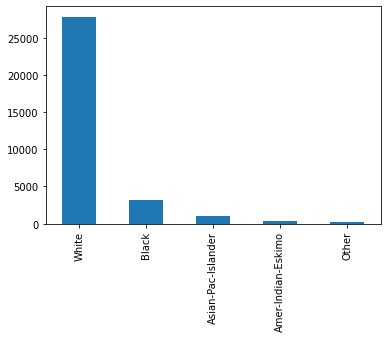

In [ ]:
df.race.value_counts().plot(kind='bar')


In [ ]:
df.sex.value_counts() #na tej podstawie stratify = y

Male      21790
Female    10771
Name: sex, dtype: int64

40.437455852092995

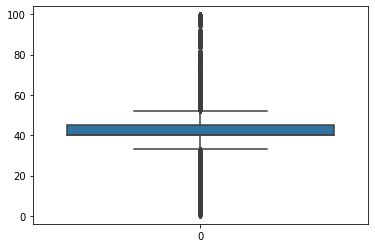

In [ ]:
ax = sns.boxplot(data=df['hours-per-week'])
np.average(df['hours-per-week'])
#np.min(df['hours-per-week'])
#np.max(df['hours-per-week'])
#np.median(df['hours-per-week'])
#np.quantile(df['hours-per-week'],0.25)
#np.quantile(df['hours-per-week'],0.75)

In [ ]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

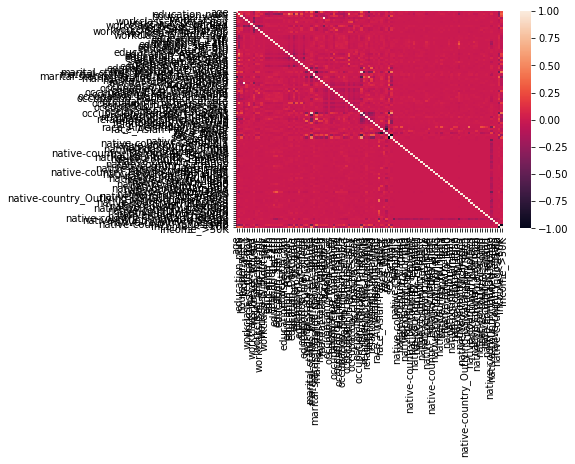

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values) #dla wartosci liczbowych 




In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
df = pd.get_dummies(df) 
df.head()
df[df.columns].sum(axis=0) #shape (32561, 107)

age                             1256257
education-num                    328237
hours-per-week                  1316684
workclass_?                        1836
workclass_Federal-gov               960
                                 ...   
native-country_United-States      29170
native-country_Vietnam               67
native-country_Yugoslavia            16
income_<=50K                      24720
income_>50K                        7841
Length: 107, dtype: int64

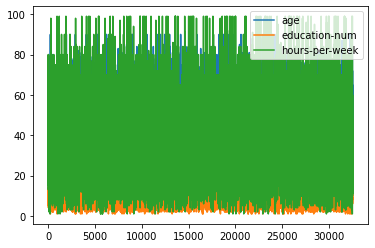

In [ ]:
df.plot()

## Task 2 - Preparing data
- Select features `X` and labels `y`. Make sure that your selection makes sense.
- Change the data into a numerical form to let your algorithm (logistic regression) deal with them
- Perform One-hot encoding if necessary
- Split your data into train and test subsets. Make sure that your split is reasonable. Use `stratify` if you consider it helpful.

In [ ]:
x = df[['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country']]  
      
x.head(100)
  

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,50,United-States
96,48,Self-emp-not-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States
97,37,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,48,United-States
98,48,Private,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,40,England


In [ ]:
y=df['income']
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [ ]:
#One-hot encoding w mojej cenie ułatwiające nadanie rangi danym wartoscia tekstowym
One-hot encoding

In [ ]:
x = pd.get_dummies(x)
y = pd.get_dummies(y)
y=y.drop(columns=['>50K'])# z powodu bledu przy inpucie modelu plus nadmiar danych
####y=y.add(pd.Series(np.ones(len(y)))) #poniewaz mape osiaga inf dla wartosci realnych zero, przesuwamy prawdopodobienstwo robocze miedzy 2 a 1
#y.insert(1,column='B', value=pd.Series(np.ones(len(y))))
#y['<=50K']=y['<=50K']+y['B']
###dla linear....
#y=y.drop(columns=['B'])
x.head()
y.head() 

,<=50K
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
   x, y, test_size=0.3,stratify=y, random_state=1 ) #stratiii
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",y_train.shape)
print("Y_test",y_test.shape)

X_train (22792, 105)
X_test (9769, 105)
Y_train (22792, 1)
Y_test (9769, 1)


## Task 4 - Logistic Regression
Train and test a logistic regression model. If you want to get a maximum score you must be sure that your model:
- Do not overfit
- Do not underfit
- Achieves at least 80% accuracy on the test subset.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


In [ ]:
print('train and test score: ',reg.score(X_train,y_train),reg.score(X_test,y_test))

train and test score:  0.34612413702732203 0.34136775390530183


In [ ]:
def mape(model, X, y):
  y_pred = model.predict(X)
  return np.mean(np.abs((y-y_pred)/y))*100

In [ ]:
print('test mape ',(mape(model=,X_test,y_test)))
print('train mape ',(mape(model,X_train,y_train)))


######################!!!!!!!!!!!!!-zapytac

#print('test mape  {:.3f}%'.format(mape(reg,X_test,y_test)))
####print(y_train)

SyntaxError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print ("Train set accuracy:", model.score(X_train, y_train))
print ("Test set accuracy:", model.score(X_test, y_test))

Train set accuracy: 0.8350737100737101
Test set accuracy: 0.8372402497696796


,<=50K
32050,1
24986,1
9837,0
31159,0
31271,0
...,...
17375,1
15766,1
6734,1
25163,0


## Task 5 - Precision and recall
- Compute precision and recall for your model, for both, train and test subsets.
- Make sure that you understand these metrics, you may be asked to explain the meaning of it.

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, model.predict(X_test)))
print(precision_score(y_train, model.predict(X_train)))

0.8672633303920333
0.8687248175977349


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, model.predict(X_test)))
print(recall_score(y_train, model.predict(X_train)))

0.9275987596063098
0.9220944344911287


## Task 6: Applying the model
Use your model to check if you will earn above 50,000$ per year. Check both the response from the model (true/false) and the probability that the response will be true. Check using the data about yourself:
- right now
- two years from now
- ten years from now

In [ ]:
x_predicted_by_me= {'age': [21,23,31], 'workclass': ['Private','Private','Private'], 'education': ['Bachelors','Masters','Masters'], 'education-num': [13,13,13], 'marital-status': ['Never-married','Never-married','Married-civ-spouse'],
       'occupation': ['Tech-support','Tech-support','Prof-specialty'], 'relationship': ['Unmarried','Unmarried','Husband'], 'race': ['White','White','White'], 'sex': ['Male','Male','Male'], 'hours-per-week': [30,60,40],
       'native-country': ['Poland','Poland','Poland']} 

input_x = pd.DataFrame(data=x_predicted_by_me)
input_x=pd.get_dummies(input_x)
input_x.head()

x_pom=X_train.head(1)
#x_pom.head()
x_pom=x_pom.append(input_x)
x_pom=x_pom.drop([32050])
x_pom=x_pom.fillna(0)
x_pom.head()

print("[2 ponizej50k, 1...]   (0)Now, (1)2y,  (2)10y:  ",model.predict(x_pom))
#print("2y:",model.predict(x_pom[].iloc(1)))
#print("10y:",model.predict(x_pom[].iloc(2)))

[2 ponizej50k, 1...]   (0)Now, (1)2y,  (2)10y:   [1 1 0]
